In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Lets create a sine wave

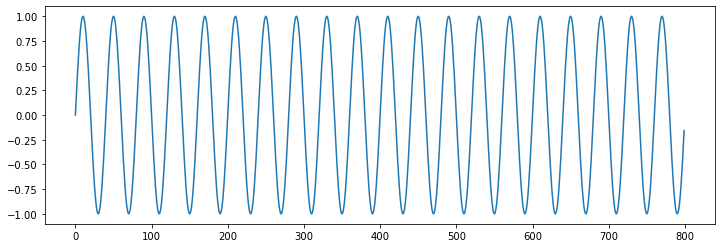

In [7]:
# let t = 1 to 800
#f  = 1/40

t = torch.linspace(0,799, steps=800)
f  = 40
y = torch.sin(2*torch.pi *t / f)

plt.figure(figsize=(12,4))
plt.plot(y)

In [8]:
y[0]

tensor(0.)

In [9]:
y.shape # Need to reshape to (Length, Batch, Features) --> (L,B, Hin) --> same as (L,N,Hin)
# (800, 1, 1)

torch.Size([800])

In [ ]:
#example of time series with two features
'''
Country: Thailand
     egg price    gold price    oil price
t0
t1
t2
t3

Country: Nepal
Country: Vietnam
'''

'''
Stock: Apple
       close price open price
t0
t1
t2

Stock: Google
'''

In [10]:
# create train and test set
# In time series test set ALWAYS THE FUTURE of train set
# Typical RNN looks forward.
# If you need bidirectional, or only forward...

test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size] # 40 ahead of train

In [19]:
#we want to create real sample
#maybe we want to use 5 data before to predict the next 3
#we call 5 as window size, and 3 as the label size

def input_data(seq, window_size, label_size=1):
    out = []
    total_length = len(seq)
    for i in range(total_length-window_size):  #if not, we will go out of bound
        window = seq[i:i+window_size]
        label  = seq[i+window_size:i+window_size+label_size]
        out.append((window, label))
    return out

#question: if my window is 3, label size is 1, my seq is 760
#        :  then what is the shape of out???

In [20]:
window_size = 40

train_data = input_data(train_set, window_size)

len(train_data) #720 = 760 - 40 

720

In [ ]:
torch.set_printoptions(sci_mode=false)
sample, target

In [21]:
torch.set_printoptions(sci_mode=False)

sample = train_data[0][0] #40 days before target
target = train_data[0][1] #41th day after the sample

sample, target

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

## 2. Create LSTM model


### Lean LSTM

In [32]:
input_size  = 1  #same as input features
hidden_size = 50 #same as output features
lstm = nn.LSTM(input_size, hidden_size, num_layers=2)

In [33]:
#out = lstm(seq) # Error because  PyTorch need (L, N, Hin)

In [34]:
seq, target = train_data[0]

In [35]:
seq = seq.reshape(len(seq), 1, -1)
seq.shape

torch.Size([40, 1, 1])

In [36]:
out = lstm(seq)

In [37]:
out

(tensor([[[-0.0181, -0.0129, -0.0334,  ...,  0.0411, -0.0153, -0.0070]],
 
         [[-0.0330, -0.0177, -0.0506,  ...,  0.0565, -0.0266, -0.0078]],
 
         [[-0.0435, -0.0202, -0.0584,  ...,  0.0616, -0.0346, -0.0071]],
 
         ...,
 
         [[-0.0487, -0.0123, -0.0657,  ...,  0.0768, -0.0657, -0.0156]],
 
         [[-0.0501, -0.0134, -0.0652,  ...,  0.0758, -0.0643, -0.0147]],
 
         [[-0.0517, -0.0147, -0.0646,  ...,  0.0744, -0.0627, -0.0137]]],
        grad_fn=<StackBackward0>),
 (tensor([[[-0.0543,  0.0970,  0.0565, -0.0627,  0.0420, -0.1244, -0.1228,
            -0.0026,  0.0208, -0.0002,  0.0749, -0.0079, -0.0177, -0.0137,
             0.0279, -0.0751,  0.0241, -0.0008,  0.0094, -0.0033, -0.0441,
             0.0412, -0.0260, -0.0214,  0.0184, -0.0390,  0.0343, -0.0422,
            -0.1139, -0.0218,  0.0899,  0.0184,  0.0891, -0.0472, -0.0133,
            -0.1334, -0.0353,  0.0749,  0.0045,  0.0989,  0.0304, -0.0182,
             0.0487,  0.0077,  0.0380, -0.0754, -0

In [38]:
out, (hn, cn) = lstm(seq)
print(out.shape) #[40, 1, 50] ==> (L, N, Hout)
print(hn.shape)# [1,1,50] ==> (D*num_layer, N, Hout)

torch.Size([40, 1, 50])
torch.Size([2, 1, 50])


In [39]:
print(out[-1,:, :])
print(hn)

tensor([[-0.0517, -0.0147, -0.0646,  0.0710,  0.0311, -0.0066,  0.0923,  0.0205,
          0.0513,  0.0210,  0.0814,  0.0137, -0.0145,  0.0675,  0.0117, -0.0968,
          0.0403, -0.1048,  0.0604, -0.0443, -0.1023,  0.0158,  0.0866, -0.0632,
          0.0469, -0.0109, -0.0571,  0.0614, -0.0225,  0.0096, -0.0200,  0.0125,
          0.0461, -0.0554,  0.0084, -0.0533,  0.0105, -0.0387, -0.0192, -0.0602,
          0.0183, -0.0099,  0.0407,  0.0054, -0.0027, -0.0628,  0.1131,  0.0744,
         -0.0627, -0.0137]], grad_fn=<SliceBackward0>)
tensor([[[-0.0543,  0.0970,  0.0565, -0.0627,  0.0420, -0.1244, -0.1228,
          -0.0026,  0.0208, -0.0002,  0.0749, -0.0079, -0.0177, -0.0137,
           0.0279, -0.0751,  0.0241, -0.0008,  0.0094, -0.0033, -0.0441,
           0.0412, -0.0260, -0.0214,  0.0184, -0.0390,  0.0343, -0.0422,
          -0.1139, -0.0218,  0.0899,  0.0184,  0.0891, -0.0472, -0.0133,
          -0.1334, -0.0353,  0.0749,  0.0045,  0.0989,  0.0304, -0.0182,
           0.0487,  0

In [40]:
assert (out[-1, :, :] == hn[1]).all()

## 3. Design NN

In [41]:
class chakyLSTM(nn.Module):
    #why out_size = 1, because later on, we will label_size = 1
    def __init__(self, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm   = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size) #taking the last hidden state
        
        #optional
        #h0, c0
        #(D*num layer, N, Hin)
        self.hidden = (torch.zeros(1, 1, hidden_size),
                       torch.zeros(1, 1, hidden_size))
        
    def forward(self, seq):
        #seq.shape
        seq = seq.reshape(len(seq), 1, -1)
        #seq shape: (40, 1, 1)
        out, (_, _) = self.lstm(seq, self.hidden) #you don't need self.hidden
        #out shape: (L, N, Hout * D) ==> (40, 1, 50)
        out = out[-1, :, :] #(B, Hout)
        #out shape: (1, 50)
        out = self.linear(out)
        #out shape: (1, 1)
        return out

## 4. Test our model

In [42]:
random_data = torch.rand(40)

torch.manual_seed(999)
model = chakyLSTM()

out = model(random_data)

In [43]:
out

tensor([[-0.0318]], grad_fn=<AddmmBackward0>)

## 5. Train

In [44]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

chakyLSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [45]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


In [ ]:
epochs = 10

for in in range(epochs):
    for seq, y_train in train_data:
        yhat = model(seq)#1. Predict
        yhat = yhat.reshape(-1)
        loss = criterion(yhat, y_train)#2. Loss
        optimizer.zero_grad()#3.zero_grad
        loss.backwarad()#4. backward
        optimizer.step()#5. steprd
        
    print(f'Epoch: {i} - Loss: {loss})
    preds = train_set[-window_size:] # Last 40 values
          
    # Do the validation right away
    for i in range(future): #0 -39
          seq = torch.FloatTensor(preds[-window_size:]) # Creates an empty array of size 40
          with torch.no_grad():
              yhat = model(seq)
              preds.append(yhat)
    loss = criterion(torch.tensor(preds[-window_size:], y[760:]))
            